In [1]:
# import libraries
import pandas as pd
import warnings

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine #, func
from sqlalchemy.orm import Session
from sqlalchemy import text
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#Read data and create dataframe

filtered_df = pd.read_csv("Resources/filtered_df.csv")
#filtered_df

# Create a SQLite database engine
engine = create_engine('sqlite:///filtered_df.sqlite')

# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

# Write DataFrame to SQLite database
filtered_df.to_sql('realtor_filtered', con=engine, if_exists='replace', index=False)

# Confirm the data has been written by querying the database
query = "SELECT * FROM realtor_filtered;"  # Example query
with engine.connect() as conn:
    result = conn.execute(text(query))

In [3]:
df = result
df = pd.DataFrame(df)
df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,None
1,for_sale,239900.0,3.0,1.0,0.46,Agawam,Massachusetts,1001.0,1196.0,None
2,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
4,for_sale,275000.0,4.0,2.0,0.11,Agawam,Massachusetts,1001.0,1732.0,None
...,...,...,...,...,...,...,...,...,...,...
1353428,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
1353429,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
1353430,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
1353431,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


In [4]:
# filter out unnecessary columns
df = df[[ 'bed', 'bath','acre_lot','zip_code','house_size', 'price']]
df.head()

,bed,bath,acre_lot,zip_code,house_size,price
0,2.0,1.0,0.34,1001.0,676.0,180000.0
1,3.0,1.0,0.46,1001.0,1196.0,239900.0
2,3.0,3.0,0.45,1001.0,2314.0,525000.0
3,3.0,2.0,0.36,1001.0,1276.0,289900.0
4,4.0,2.0,0.11,1001.0,1732.0,275000.0


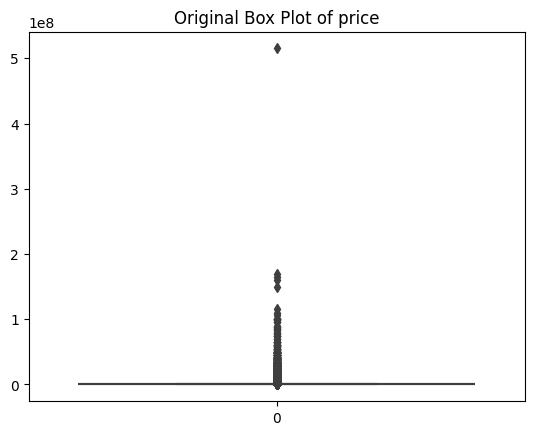

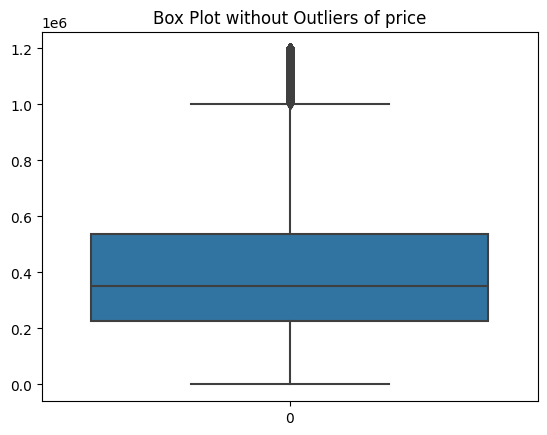

In [16]:
# function to show box-and-whisker plot before and after outlier removal
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 1200000

no_outliers = removal_box_plot(df, 'price', threshold_value)

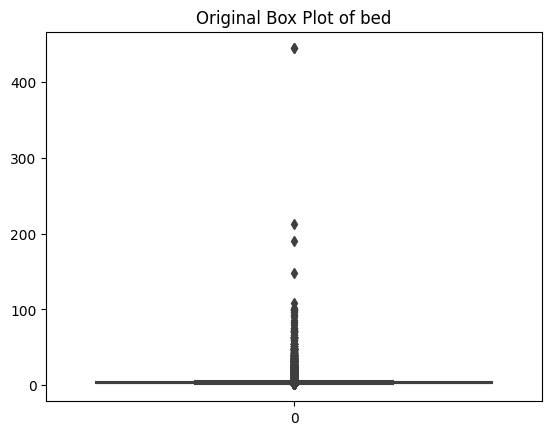

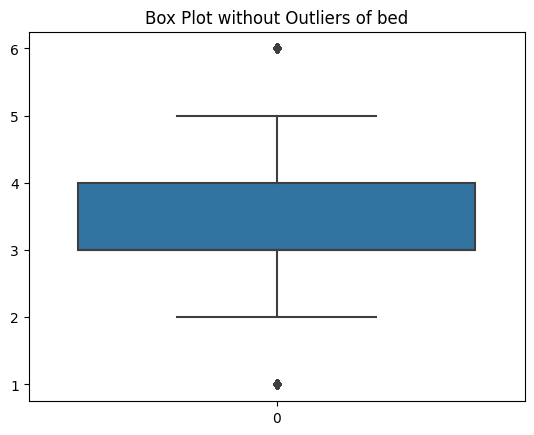

In [7]:
threshold_value = 6

no_outliers = removal_box_plot(df, 'bed', threshold_value)

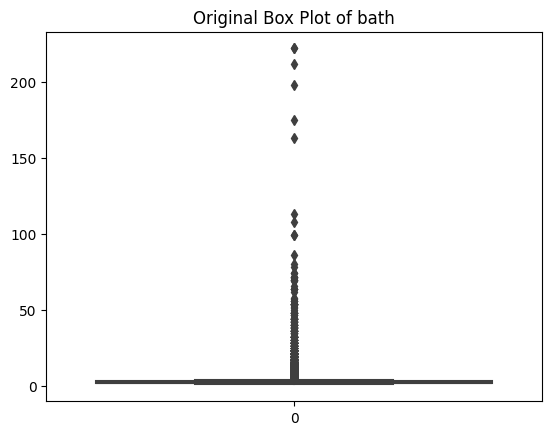

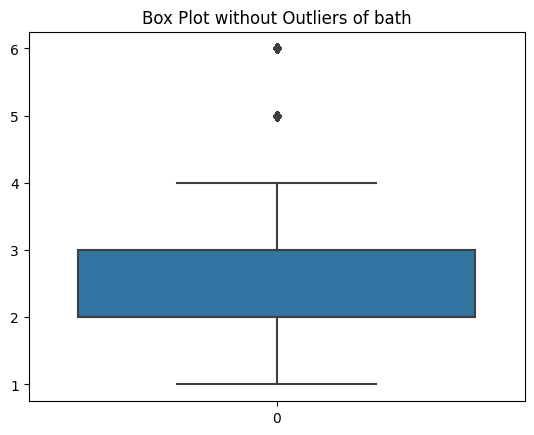

In [8]:
threshold_value = 6

no_outliers = removal_box_plot(df, 'bath', threshold_value)

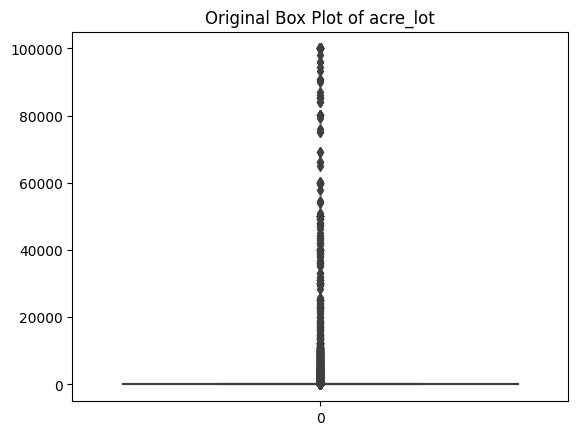

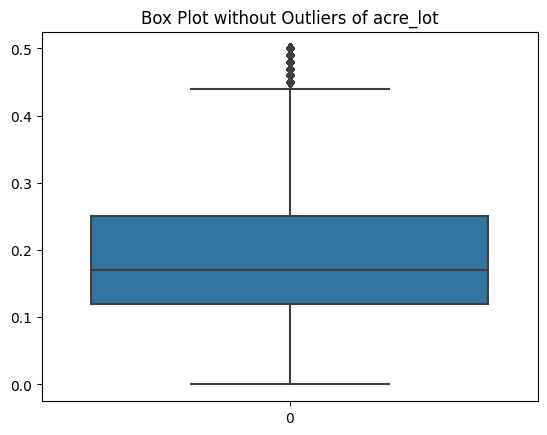

In [14]:
threshold_value = 0.5

no_outliers = removal_box_plot(df, 'acre_lot', threshold_value)

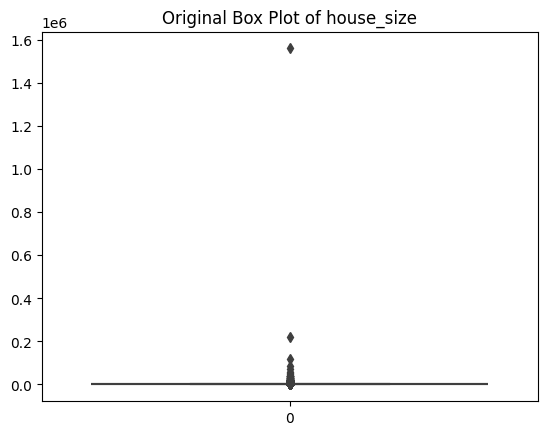

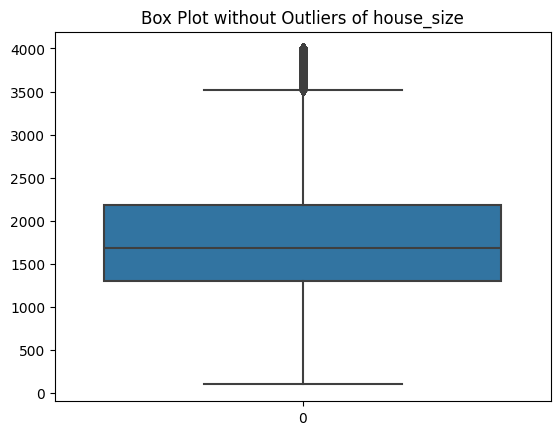

In [21]:
threshold_value = 4000

no_outliers = removal_box_plot(df, 'house_size', threshold_value)

In [22]:
df=df[(df['price'] < 1200000) & (df['bed'] < 6) & (df['bath'] < 6) & (df['acre_lot'] < 0.5) & (df['house_size'] < 4000)]
df

,bed,bath,acre_lot,zip_code,house_size,price
0,2.0,1.0,0.34,1001.0,676.0,180000.0
1,3.0,1.0,0.46,1001.0,1196.0,239900.0
2,3.0,3.0,0.45,1001.0,2314.0,525000.0
3,3.0,2.0,0.36,1001.0,1276.0,289900.0
4,4.0,2.0,0.11,1001.0,1732.0,275000.0
...,...,...,...,...,...,...
1353427,4.0,2.0,0.20,99354.0,2780.0,339900.0
1353428,4.0,2.0,0.33,99354.0,3600.0,359900.0
1353429,3.0,2.0,0.10,99354.0,1616.0,350000.0
1353431,2.0,1.0,0.09,99354.0,933.0,179900.0
